In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mypipes import *
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

from ModelClassification import *

In [4]:
filepath="G:\Python_new\Project5\Property_train.csv"

In [5]:
Real_Estate=pd.read_csv(filepath)

In [6]:
Real_Estate["EnvRating"]=='missing'

0        True
1        True
2        True
3        True
4        True
         ... 
62030    True
62031    True
62032    True
62033    True
62034    True
Name: EnvRating, Length: 62035, dtype: bool

In [7]:
Real_Estate.loc[(Real_Estate["EnvRating"]=='GREEN') & (Real_Estate["Junk"]==0) , :]


,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
30,0,V3Y1,10898.0,12/14/2010,NYFD,7130,CAT2,A,GREEN,9242.0,...,A,5390.0,QW88,GOLD,PA,86858,2005,A,5,6880.0
85,0,3MP1,11222.0,11/10/2010,C8A4,8750,CAT1,B,GREEN,9891.0,...,A,6439.0,3IAL,SILVER,FL,41361,2005,A,5,7726.0
119,0,WEGU,8287.0,11/4/2010,IKAF,5515,CAT3,B,GREEN,6860.0,...,A,3452.0,XHI5,WHITE,TX,75025,2004,A,6,4286.0
137,0,UM2V,11563.0,10/4/2010,OZMT,7400,CAT3,A,GREEN,10310.0,...,A,6752.0,AVW5,SILVER,NC,64895,2005,A,5,7488.0
152,0,5KS5,11307.0,12/9/2010,C8A4,6375,CAT1,B,GREEN,9844.0,...,A,6308.0,FIVQ,GREY,CO,91731,2007,A,3,7528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61976,0,GK4G,5918.0,12/1/2010,RRJQ,4450,OTHER,B,GREEN,5198.0,...,A,2272.0,8YTZ,GOLD,FL,85828,2005,B,5,3979.0
61980,0,DFWJ,6319.0,12/22/2010,K5JL,4435,CAT1,B,GREEN,4688.0,...,A,2763.0,JPK5,WHITE,TX,84193,2001,A,9,3829.0
62022,0,WEGU,4677.0,11/11/2010,JUNM,4605,CAT3,A,GREEN,4117.0,...,A,1417.0,526I,SILVER,TX,87287,2002,A,8,3028.0
62023,0,K3BB,8840.0,10/5/2010,4ZHP,5385,CAT2,B,GREEN,7758.0,...,A,4408.0,M81Y,WHITE,TX,94138,2005,A,5,5058.0


In [8]:
62037-59092


2945

In [9]:
(2875-2766)/2875

0.03791304347826087

array([[<Axes: title={'center': 'Junk'}>,
        <Axes: title={'center': 'PriceIndex9'}>,
        <Axes: title={'center': 'ExpeditedListing'}>],
       [<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'InsurancePremiumIndex'}>,
        <Axes: title={'center': 'NormalisedPopulation'}>],
       [<Axes: title={'center': 'BuildYear'}>,
        <Axes: title={'center': 'PropertyAge'}>, <Axes: >]], dtype=object)

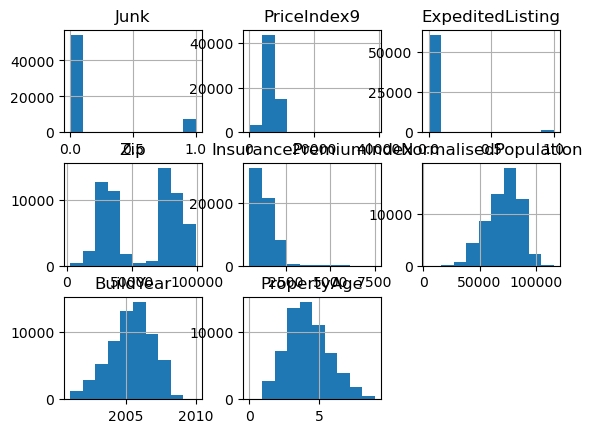

In [10]:
Real_Estate.hist()

In [11]:
train_data,test_data=train_test_split(Real_Estate,test_size=0.2,random_state=42)

In [12]:
train_data.to_csv(r"G:\Python_new\Project5\bd_train.csv",index=False)
test_data.to_csv(r"G:\Python_new\Project5\bd_test.csv",index=False)

In [13]:
bd_train=pd.read_csv(r"G:\Python_new\Project5\bd_train.csv")
bd_test=pd.read_csv(r"G:\Python_new\Project5\bd_test.csv")
Real_Estate_test=pd.read_csv("G:\Python_new\Project5\Property_test_share.csv")

In [14]:
bd_train

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6UCD,12526.0,11/13/2009,ZCI3,8105,CAT2,B,missing,11713.0,...,A,8018.0,FIVQ,SILVER,TN,42717,2008,A,1,8657.0
1,1,X07E,19071.0,4/8/2010,JD5J,10185,CAT2,A,missing,16300.0,...,A,12221.0,7529,BLACK,CO,94947,2006,A,4,14776.0
2,0,RELA,6080.0,3/4/2009,5GAZ,4160,CAT1,B,missing,4720.0,...,A,3907.0,ONP1,RED,AZ,82530,2004,A,5,4457.0
3,0,98SV,12752.0,11/18/2009,RRJQ,9700,OTHER,A,missing,11510.0,...,A,7914.0,6G22,SILVER,SC,73722,2004,C,5,9128.0
4,0,K3BB,10110.0,8/5/2010,4ZHP,4785,CAT2,B,missing,8369.0,...,A,4715.0,M81Y,BLACK,OK,68313,2006,A,4,6022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49623,1,VQNR,4311.0,9/17/2009,ZCI3,2570,CAT3,missing,missing,3252.0,...,A,2548.0,UA42,GREEN,NC,92504,2003,A,6,3443.0
49624,0,OR99,10896.0,2/20/2009,9TQI,9475,CAT1,A,missing,8946.0,...,A,7820.0,8UTN,BLACK,CA,81484,2003,A,6,7745.0
49625,0,V3Y1,9412.0,3/4/2009,NYFD,6230,CAT2,A,missing,7748.0,...,A,6711.0,QW88,SILVER,CA,69249,2005,A,4,7935.0
49626,1,7KCI,10515.0,7/22/2009,C8A4,5870,CAT1,B,missing,8774.0,...,A,7661.0,BNAA,GOLD,TN,90061,2006,A,3,11066.0


In [15]:
bd_test

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,RCQE,12191.0,3/31/2010,X7IX,7580,CAT1,B,missing,10640.0,...,A,7193.0,IAQO,GREY,FL,71393,2006,A,4,8736.0
1,0,VQNR,3825.0,3/25/2009,IKAF,4160,CAT3,B,missing,3119.0,...,A,2425.0,XHI5,SILVER,AZ,85810,2003,A,6,3655.0
2,0,G6JQ,10571.0,8/21/2009,ZCI3,8300,CAT2,B,missing,9753.0,...,A,8568.0,FIVQ,WHITE,OK,44711,2008,A,1,9007.0
3,0,QWEV,9651.0,2/24/2010,PRN0,6240,CAT1,B,missing,7961.0,...,A,4922.0,FIVQ,GREY,VA,83546,2005,A,5,6589.0
4,0,87HV,13057.0,8/18/2009,IKAF,10590,OTHER,A,missing,10956.0,...,A,7744.0,GQ1W,BLACK,CO,68287,2004,C,5,9747.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12402,0,EN73,14207.0,8/27/2009,PRN0,9465,CAT3,A,missing,12863.0,...,A,8948.0,GXUO,RED,FL,53218,2006,A,3,12483.0
12403,1,MTA3,6377.0,3/18/2010,PRN0,4765,CAT1,A,missing,5246.0,...,A,2538.0,FIVQ,SILVER,CO,92287,2004,A,6,0.0
12404,1,G6JQ,10269.0,7/22/2009,ZCI3,7800,CAT2,missing,missing,9350.0,...,A,8194.0,FIVQ,ORANGE,OK,50051,2008,A,1,9045.0
12405,1,7857,6555.0,12/16/2010,ZCI3,4910,CAT1,A,missing,5902.0,...,A,3426.0,T04H,GREY,TX,56381,2002,A,8,3354.0


In [16]:
49628+12407

62035

In [17]:
bd_train.isnull().sum()

Junk                     0
InteriorsStyle           0
PriceIndex8              0
ListDate                 0
Material                 0
PriceIndex9              0
Agency                   0
AreaIncomeType           0
EnvRating                0
PriceIndex7              0
ExpeditedListing         0
PriceIndex4              0
PriceIndex1              0
PriceIndex6              0
PRIMEUNIT                0
Channel                  0
Zip                      0
InsurancePremiumIndex    0
PlotType                 0
Architecture             0
PriceIndex3              0
Region                   0
PriceIndex5              0
SubModel                 0
Facade                   0
State                    0
NormalisedPopulation     0
BuildYear                0
RegionType               0
PropertyAge              0
PriceIndex2              0
dtype: int64

In [18]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49628 entries, 0 to 49627
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Junk                   49628 non-null  int64 
 1   InteriorsStyle         49628 non-null  object
 2   PriceIndex8            49628 non-null  object
 3   ListDate               49628 non-null  object
 4   Material               49628 non-null  object
 5   PriceIndex9            49628 non-null  int64 
 6   Agency                 49628 non-null  object
 7   AreaIncomeType         49628 non-null  object
 8   EnvRating              49628 non-null  object
 9   PriceIndex7            49628 non-null  object
 10  ExpeditedListing       49628 non-null  int64 
 11  PriceIndex4            49628 non-null  object
 12  PriceIndex1            49628 non-null  object
 13  PriceIndex6            49628 non-null  object
 14  PRIMEUNIT              49628 non-null  object
 15  Channel            

array([[<Axes: title={'center': 'Junk'}>,
        <Axes: title={'center': 'PriceIndex9'}>,
        <Axes: title={'center': 'ExpeditedListing'}>],
       [<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'InsurancePremiumIndex'}>,
        <Axes: title={'center': 'NormalisedPopulation'}>],
       [<Axes: title={'center': 'BuildYear'}>,
        <Axes: title={'center': 'PropertyAge'}>, <Axes: >]], dtype=object)

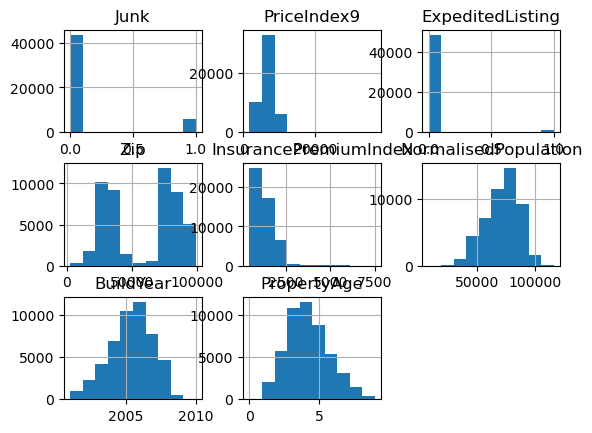

In [19]:
bd_train.hist()

In [20]:
bd_train

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6UCD,12526.0,11/13/2009,ZCI3,8105,CAT2,B,missing,11713.0,...,A,8018.0,FIVQ,SILVER,TN,42717,2008,A,1,8657.0
1,1,X07E,19071.0,4/8/2010,JD5J,10185,CAT2,A,missing,16300.0,...,A,12221.0,7529,BLACK,CO,94947,2006,A,4,14776.0
2,0,RELA,6080.0,3/4/2009,5GAZ,4160,CAT1,B,missing,4720.0,...,A,3907.0,ONP1,RED,AZ,82530,2004,A,5,4457.0
3,0,98SV,12752.0,11/18/2009,RRJQ,9700,OTHER,A,missing,11510.0,...,A,7914.0,6G22,SILVER,SC,73722,2004,C,5,9128.0
4,0,K3BB,10110.0,8/5/2010,4ZHP,4785,CAT2,B,missing,8369.0,...,A,4715.0,M81Y,BLACK,OK,68313,2006,A,4,6022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49623,1,VQNR,4311.0,9/17/2009,ZCI3,2570,CAT3,missing,missing,3252.0,...,A,2548.0,UA42,GREEN,NC,92504,2003,A,6,3443.0
49624,0,OR99,10896.0,2/20/2009,9TQI,9475,CAT1,A,missing,8946.0,...,A,7820.0,8UTN,BLACK,CA,81484,2003,A,6,7745.0
49625,0,V3Y1,9412.0,3/4/2009,NYFD,6230,CAT2,A,missing,7748.0,...,A,6711.0,QW88,SILVER,CA,69249,2005,A,4,7935.0
49626,1,7KCI,10515.0,7/22/2009,C8A4,5870,CAT1,B,missing,8774.0,...,A,7661.0,BNAA,GOLD,TN,90061,2006,A,3,11066.0


In [21]:
(bd_train[["EnvRating"]]=='GREEN').sum()

EnvRating    2296
dtype: int64

In [22]:
bd_train.loc[ (bd_train["EnvRating"]=='GREEN') & (bd_train["Junk"]==0) , :]

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
20,0,E6KW,14316.0,11/17/2010,HE5A,8800,CAT1,A,GREEN,12509.0,...,A,8099.0,8YTZ,GREY,SC,72690,2006,A,4,10467.0
40,0,SWDG,10220.0,11/24/2010,JUNM,5390,CAT3,A,GREEN,8483.0,...,A,4757.0,HHKK,MAROON,AR,89458,2005,A,5,5672.0
42,0,KHJD,14334.0,9/28/2010,IKAF,7615,CAT2,B,GREEN,11786.0,...,A,6837.0,GR5P,BLUE,OH,86326,2007,A,3,9275.0
58,0,RCQE,12062.0,10/27/2010,X7IX,8085,CAT1,A,GREEN,10834.0,...,A,7435.0,IAQO,BROWN,TX,75371,2007,A,3,8464.0
63,0,HQC2,11306.0,11/23/2010,WO6R,10280,CAT2,B,GREEN,9850.0,...,A,5864.0,AJTU,WHITE,AZ,81753,2004,A,6,8608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49567,0,E6M1,13369.0,12/1/2010,3WH2,6350,OTHER,B,GREEN,12371.0,...,B,8747.0,NCN6,SILVER,FL,91068,2008,C,2,9216.0
49587,0,YOC7,10903.0,12/1/2010,HE5A,6130,OTHER,A,GREEN,9856.0,...,A,6331.0,E75G,RED,TX,72153,2007,B,3,6143.0
49607,0,7CIG,9277.0,12/8/2010,NV0M,6325,OTHER,A,GREEN,7707.0,...,A,4529.0,8DAV,WHITE,TX,88921,2003,B,7,5204.0
49608,0,QD0H,11477.0,10/13/2010,RRJQ,7250,OTHER,A,GREEN,10077.0,...,A,5866.0,BUNS,BLUE,FL,88802,2005,B,5,8114.0


In [23]:
(bd_train[["EnvRating"]]=='RED').sum()

EnvRating    56
dtype: int64

In [24]:
bd_train.loc[ (bd_train["EnvRating"]=='RED') & (bd_train["Junk"]==1) , :]

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
6101,1,439A,6621.0,12/9/2010,HE5A,3310,CAT1,A,RED,5517.0,...,A,2655.0,PVH0,BLUE,AR,107151,2002,A,8,3558.0
26519,1,WEGU,7271.0,12/7/2010,ZCI3,3900,CAT3,A,RED,5918.0,...,A,3341.0,UA42,BLACK,TN,96445,2004,A,6,4204.0
28425,1,WEGU,7961.0,12/14/2010,IKAF,4210,CAT3,B,RED,6837.0,...,A,3496.0,XHI5,SILVER,TX,115026,2004,A,6,4860.0
32049,1,ARIH,6259.0,12/7/2010,JK9T,4000,OTHER,B,RED,5564.0,...,A,2994.0,KZ70,MAROON,TN,109728,2003,C,7,3379.0
45576,1,CUBU,5367.0,12/20/2010,ZCI3,2010,CAT1,B,RED,4538.0,...,B,1876.0,M0KE,RED,TX,90096,2002,A,8,2617.0
47836,1,WEGU,8383.0,12/7/2010,ZCI3,3925,CAT3,B,RED,6878.0,...,A,3279.0,UA42,WHITE,LA,101961,2005,A,5,4359.0


In [25]:
(bd_train[["EnvRating"]]=='missing').sum()

EnvRating    47276
dtype: int64

In [26]:
bd_train[["Zip"]].nunique()

Zip    150
dtype: int64

array([[<Axes: title={'center': 'Junk'}>,
        <Axes: title={'center': 'PriceIndex9'}>,
        <Axes: title={'center': 'ExpeditedListing'}>],
       [<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'InsurancePremiumIndex'}>,
        <Axes: title={'center': 'NormalisedPopulation'}>],
       [<Axes: title={'center': 'BuildYear'}>,
        <Axes: title={'center': 'PropertyAge'}>, <Axes: >]], dtype=object)

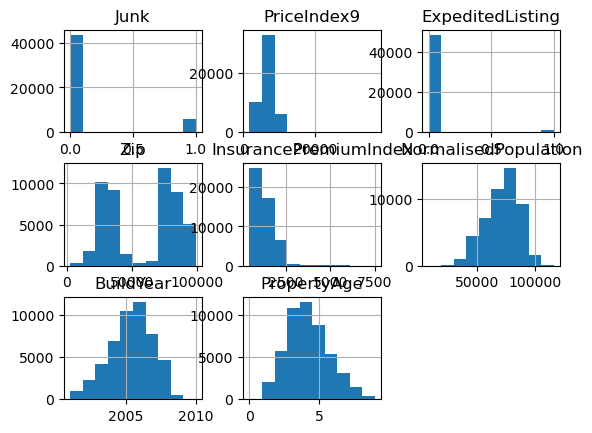

In [27]:
bd_train.hist()

In [28]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49628 entries, 0 to 49627
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Junk                   49628 non-null  int64 
 1   InteriorsStyle         49628 non-null  object
 2   PriceIndex8            49628 non-null  object
 3   ListDate               49628 non-null  object
 4   Material               49628 non-null  object
 5   PriceIndex9            49628 non-null  int64 
 6   Agency                 49628 non-null  object
 7   AreaIncomeType         49628 non-null  object
 8   EnvRating              49628 non-null  object
 9   PriceIndex7            49628 non-null  object
 10  ExpeditedListing       49628 non-null  int64 
 11  PriceIndex4            49628 non-null  object
 12  PriceIndex1            49628 non-null  object
 13  PriceIndex6            49628 non-null  object
 14  PRIMEUNIT              49628 non-null  object
 15  Channel            

In [29]:
cat_var=["InteriorsStyle","Material","Agency","AreaIncomeType","EnvRating","ExpeditedListing","Channel","Zip","InsurancePremiumIndex","PlotType","Architecture","Region","SubModel","Facade","State","BuildYear","RegionType","PropertyAge"]

In [30]:
bd_train[cat_var]=bd_train[cat_var].astype(object)
bd_test[cat_var]=bd_test[cat_var].astype(object)
Real_Estate_test[cat_var]=Real_Estate_test[cat_var].astype(object)

In [31]:
bd_train[cat_var].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49628 entries, 0 to 49627
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   InteriorsStyle         49628 non-null  object
 1   Material               49628 non-null  object
 2   Agency                 49628 non-null  object
 3   AreaIncomeType         49628 non-null  object
 4   EnvRating              49628 non-null  object
 5   ExpeditedListing       49628 non-null  object
 6   Channel                49628 non-null  object
 7   Zip                    49628 non-null  object
 8   InsurancePremiumIndex  49628 non-null  object
 9   PlotType               49628 non-null  object
 10  Architecture           49628 non-null  object
 11  Region                 49628 non-null  object
 12  SubModel               49628 non-null  object
 13  Facade                 49628 non-null  object
 14  State                  49628 non-null  object
 15  BuildYear          

In [32]:
num_var=["PriceIndex1","PriceIndex2","PriceIndex3","PriceIndex4","PriceIndex5","PriceIndex6","PriceIndex7","PriceIndex8","PriceIndex9","NormalisedPopulation"]

In [33]:
for col in num_var:
    bd_train[col]=bd_train[col].replace("missing","0")
for col in num_var:
    bd_test[col]=bd_test[col].replace("missing","0")        
for col in num_var:
    Real_Estate_test[col]=Real_Estate_test[col].replace("missing","0")        
bd_train[num_var]=bd_train[num_var].astype(float)
bd_test[num_var]=bd_test[num_var].astype(float)
Real_Estate_test[num_var]=Real_Estate_test[num_var].astype(float)

In [34]:
date_var=["ListDate"]

In [35]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [36]:
p1=pdPipeline([
    ('var_select',VarSelector(cat_var)), 
    ('data_frame_imputer',DataFrameImputer()),
    ('get_dummies_Pipe',get_dummies_Pipe(20))
])

p2=pdPipeline([
    ('var_select',VarSelector(num_var)),
    ('data_frame_imputer',DataFrameImputer())
])
p3=pdPipeline([
    ('var_select',VarSelector(date_var)),
    ('Date_data',Date_data()),
    ('data_frame_imputer',DataFrameImputer())
])
    

In [37]:
data_pipe=FeatureUnion([
    ('p1',p1),
    ('p2',p2),
    ('p3',p3)
])

In [38]:
bd_train

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6UCD,12526.0,11/13/2009,ZCI3,8105.0,CAT2,B,missing,11713.0,...,A,8018.0,FIVQ,SILVER,TN,42717.0,2008,A,1,8657.0
1,1,X07E,19071.0,4/8/2010,JD5J,10185.0,CAT2,A,missing,16300.0,...,A,12221.0,7529,BLACK,CO,94947.0,2006,A,4,14776.0
2,0,RELA,6080.0,3/4/2009,5GAZ,4160.0,CAT1,B,missing,4720.0,...,A,3907.0,ONP1,RED,AZ,82530.0,2004,A,5,4457.0
3,0,98SV,12752.0,11/18/2009,RRJQ,9700.0,OTHER,A,missing,11510.0,...,A,7914.0,6G22,SILVER,SC,73722.0,2004,C,5,9128.0
4,0,K3BB,10110.0,8/5/2010,4ZHP,4785.0,CAT2,B,missing,8369.0,...,A,4715.0,M81Y,BLACK,OK,68313.0,2006,A,4,6022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49623,1,VQNR,4311.0,9/17/2009,ZCI3,2570.0,CAT3,missing,missing,3252.0,...,A,2548.0,UA42,GREEN,NC,92504.0,2003,A,6,3443.0
49624,0,OR99,10896.0,2/20/2009,9TQI,9475.0,CAT1,A,missing,8946.0,...,A,7820.0,8UTN,BLACK,CA,81484.0,2003,A,6,7745.0
49625,0,V3Y1,9412.0,3/4/2009,NYFD,6230.0,CAT2,A,missing,7748.0,...,A,6711.0,QW88,SILVER,CA,69249.0,2005,A,4,7935.0
49626,1,7KCI,10515.0,7/22/2009,C8A4,5870.0,CAT1,B,missing,8774.0,...,A,7661.0,BNAA,GOLD,TN,90061.0,2006,A,3,11066.0


In [39]:
bd_train.shape

(49628, 31)

In [40]:
dp_fit=data_pipe.fit(bd_train)

In [41]:
dp_fit.get_feature_names_out()

array(['p1__InteriorsStyle_K3BB', 'p1__InteriorsStyle_RCQE',
       'p1__InteriorsStyle_WEGU', ..., 'p3__month_cos', 'p3__weekday_sin',
       'p3__weekday_cos'], dtype=object)

In [42]:
columns=[re.sub('p\d__','',nm) for nm in dp_fit.get_feature_names_out()]
columns

['InteriorsStyle_K3BB',
 'InteriorsStyle_RCQE',
 'InteriorsStyle_WEGU',
 'InteriorsStyle_2XWO',
 'InteriorsStyle_V3Y1',
 'InteriorsStyle_YBQJ',
 'InteriorsStyle_DUFA',
 'InteriorsStyle_7R8J',
 'InteriorsStyle_H1CI',
 'InteriorsStyle_ARWN',
 'InteriorsStyle_AZMX',
 'InteriorsStyle_T67A',
 'InteriorsStyle_F59U',
 'InteriorsStyle_QWEV',
 'InteriorsStyle_Y4AM',
 'InteriorsStyle_RZ14',
 'InteriorsStyle_J20T',
 'InteriorsStyle_7NL9',
 'InteriorsStyle_6UCD',
 'InteriorsStyle_RELA',
 'InteriorsStyle_CRVM',
 'InteriorsStyle_YOC7',
 'InteriorsStyle_GK4G',
 'InteriorsStyle_8GE9',
 'InteriorsStyle_I45U',
 'InteriorsStyle_5KS5',
 'InteriorsStyle_DT7U',
 'InteriorsStyle_QEXX',
 'InteriorsStyle_6N4N',
 'InteriorsStyle_NIBY',
 'InteriorsStyle_T0CD',
 'InteriorsStyle_BX7I',
 'InteriorsStyle_YDVX',
 'InteriorsStyle_I7GR',
 'InteriorsStyle_FSJW',
 'InteriorsStyle_DYK9',
 'InteriorsStyle_A7XW',
 'InteriorsStyle_P932',
 'InteriorsStyle_CNKZ',
 'InteriorsStyle_2TEG',
 'InteriorsStyle_K3XP',
 'InteriorsStyle

In [43]:
x_train=pd.DataFrame(data=dp_fit.transform(bd_train),columns=columns)
x_test=pd.DataFrame(data=dp_fit.transform(bd_test),columns=columns)
x_test1=pd.DataFrame(data=dp_fit.transform(Real_Estate_test),columns=columns)

In [44]:
x_train.shape

(49628, 1049)

In [45]:
x_test.shape

(12407, 1049)

In [46]:
y_train=(bd_train[['Junk']]==1).astype(int)
y_test=(bd_test[['Junk']]==1).astype(int)

In [47]:
y_train.shape

(49628, 1)

In [48]:
y_train

,Junk
0,0
1,1
2,0
3,0
4,0
...,...
49623,1
49624,0
49625,0
49626,1


[-0.00295322]
[('InteriorsStyle_K3BB', 0.020929850643660174), ('InteriorsStyle_RCQE', -0.008536065092420147), ('InteriorsStyle_WEGU', -0.0070666646234095855), ('InteriorsStyle_2XWO', 0.004911774859975926), ('InteriorsStyle_V3Y1', -0.0009422251548660451), ('InteriorsStyle_YBQJ', -0.00750521522840867), ('InteriorsStyle_DUFA', -0.005935622053427664), ('InteriorsStyle_7R8J', 0.0008849823094879389), ('InteriorsStyle_H1CI', -0.000603137002669144), ('InteriorsStyle_ARWN', 0.0001133740356982407), ('InteriorsStyle_AZMX', -0.0031648633536012554), ('InteriorsStyle_T67A', -0.008465102090403399), ('InteriorsStyle_F59U', -0.011022604937886546), ('InteriorsStyle_QWEV', -0.0027302083862236317), ('InteriorsStyle_Y4AM', -0.0019262839590122188), ('InteriorsStyle_RZ14', -0.006831805501770291), ('InteriorsStyle_J20T', -0.004890856790354138), ('InteriorsStyle_7NL9', 0.00203172424772243), ('InteriorsStyle_6UCD', -0.0030883851839569256), ('InteriorsStyle_RELA', -0.004371878862036962), ('InteriorsStyle_CRVM', 

[[0.77426324 0.22573676]
 [0.65964395 0.34035605]
 [0.41381066 0.58618934]
 ...
 [0.50312932 0.49687068]
 [0.53426084 0.46573916]
 [0.41705567 0.58294433]]
train score
[0.22573676 0.34035605 0.58618934 ... 0.49687068 0.46573916 0.58294433]
real
       Junk
0         0
1         1
2         0
3         0
4         0
...     ...
49623     1
49624     0
49625     0
49626     1
49627     0

[49628 rows x 1 columns]
    Cut-Off        F1  Precision    Recall       Acc        KS
0      0.01  0.218057   0.122375  0.999671  0.122370 -0.000329
1      0.02  0.218025   0.122358  0.999506  0.122350 -0.000494
2      0.03  0.217961   0.122322  0.999177  0.122310 -0.000823
3      0.04  0.217929   0.122305  0.999012  0.122290 -0.000988
4      0.05  0.217897   0.122287  0.998848  0.122270 -0.001152
..      ...       ...        ...       ...       ...       ...
94     0.95       NaN        NaN  0.000000  0.877589  0.000000
95     0.96       NaN        NaN  0.000000  0.877589  0.000000
96     0.97       

[[0.63213412 0.36786588]
 [0.35596169 0.64403831]
 [0.71104137 0.28895863]
 ...
 [0.6025668  0.3974332 ]
 [0.41300581 0.58699419]
 [0.38659342 0.61340658]]
[0.36786588 0.64403831 0.28895863 ... 0.3974332  0.58699419 0.61340658]
(array([0.        , 0.        , 0.        , ..., 0.99411765, 1.        ,
       1.        ]), array([0.00000000e+00, 6.54878847e-04, 4.58415193e-03, ...,
       9.98035363e-01, 9.98035363e-01, 1.00000000e+00]), array([       inf, 0.77740537, 0.76379019, ..., 0.22477052, 0.16072805,
       0.00916378]))
ROC AUC: 0.7011
None


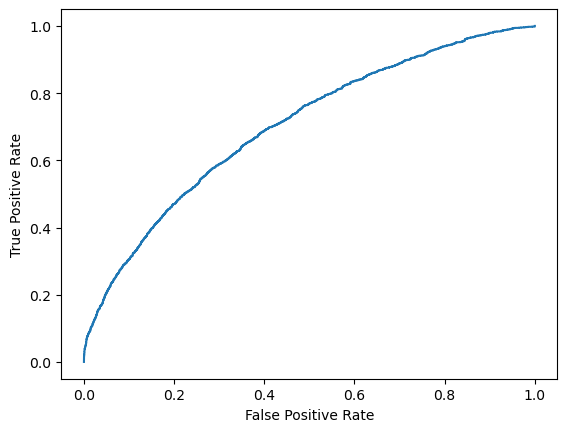

In [49]:
test_classes=LogisticR(x_train,y_train,x_test,y_test)

In [50]:
params={'class_weight':['balanced',None],'penalty':['l1','l2'],'C':[.0001,.0005,.001,.005,.01,.05,.1,1,2,5]}
model=LogisticRegression(fit_intercept=True)
'''grid_search=GridSearchCV(model, param_grid=params,cv=10,
                     scoring="roc_auc",
                     n_jobs=-1,
                     verbose=20)
grid_search.fit(x_train,y_train)
logr=grid_search.best_estimator_
print(report(grid_search.cv_results_,5))'''


logr=LogisticRegression(fit_intercept=True,
                        **{'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'l2'},solver='liblinear')
# default solver lbfgs does not support l1 penalty for some versions of sklearn
# if you get an error like that , simply use solver='liblinear', it supports both l1 & l2 penalty


logr.fit(x_train,y_train)

'''print(logr.intercept_)

a=list(zip(x_train.columns,logr.coef_[0]))
print(a)

print(logr.predict_proba(x_train))'''



cutoffs=np.linspace(0.01,0.99,99)



logr.predict_proba(x_train)


train_score=logr.predict_proba(x_train)[:,1]
real=y_train
'''print("train score")
print(train_score)
print("real")
print(real)'''
 # In  order to find the probability of which column is for outcome 1 and which for outcome 0


(train_score>0.2).astype(int)

KS_all=[]
Acc_all=[]
Recall_all=[]
Precission_all=[]
F1_all=[]
Sp_all=[]

for cutoff in cutoffs:

    predicted=(train_score>cutoff).astype(int)

    if isinstance(real, pd.DataFrame):
        real = real.iloc[:, 0]

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()

    P=TP+FN
    N=TN+FP


    KS=(TP/P)-(FP/N)
    Acc=(TP+TN)/(P+N)
    Recall=TP/(TP+FN)
    pre=TP/(TP+FP)
    F1=(2*Recall*pre)/(Recall+pre)
    sp=TN/(FP+TN) #specification

    KS_all.append(KS)
    Acc_all.append(Acc)
    Recall_all.append(Recall)
    Precission_all.append(pre)
    F1_all.append(F1)
    Sp_all.append(sp)




list(zip(cutoffs,KS_all))

mycutoff=cutoffs[F1_all==max(F1_all)]
'''print(pd.DataFrame({'Cut-Off': cutoffs,
          'F1':F1_all, 
          'Precision':Precission_all,
          'Recall':Recall_all,
         'Acc': Acc_all,
         'KS':KS_all}))
print("beta0:",logr.intercept_)
b=list(zip(x_train.columns,logr.coef_[0]))
print(b)
print(logr.predict_proba(x_test1))'''
test_score=logr.predict_proba(x_test1)[:,1]
print(test_score)
test_classes=(test_score>mycutoff).astype(int)

print(test_classes)

[0.47509396 0.5289184  0.33471287 ... 0.28671243 0.50562856 0.58520303]
[0 0 0 ... 0 0 1]


In [51]:
test_classes=pd.DataFrame({"Junk":test_score})

In [52]:
pd.DataFrame(test_classes).to_csv("Real_Estate_Yashmin_submission1.csv",index=False)

              precision    recall  f1-score   support

           0       0.93      0.71      0.81     10880
           1       0.23      0.64      0.34      1527

    accuracy                           0.70     12407
   macro avg       0.58      0.67      0.57     12407
weighted avg       0.85      0.70      0.75     12407

(array([0.00000000e+00, 1.83823529e-04, 1.83823529e-04, 2.75735294e-04,
       2.29779412e-03, 2.29779412e-03, 2.29779412e-03, 2.38970588e-03,
       2.75735294e-03, 3.12500000e-03, 3.30882353e-03, 3.40073529e-03,
       3.49264706e-03, 4.13602941e-03, 4.59558824e-03, 4.87132353e-03,
       5.05514706e-03, 5.97426471e-03, 7.26102941e-03, 7.44485294e-03,
       7.53676471e-03, 8.36397059e-03, 8.91544118e-03, 9.00735294e-03,
       9.37500000e-03, 9.92647059e-03, 1.02941176e-02, 1.10294118e-02,
       1.11213235e-02, 1.54411765e-02, 1.61764706e-02, 1.65441176e-02,
       1.80147059e-02, 1.84742647e-02, 2.15992647e-02, 2.25183824e-02,
       3.31801471e-02, 3.33639706

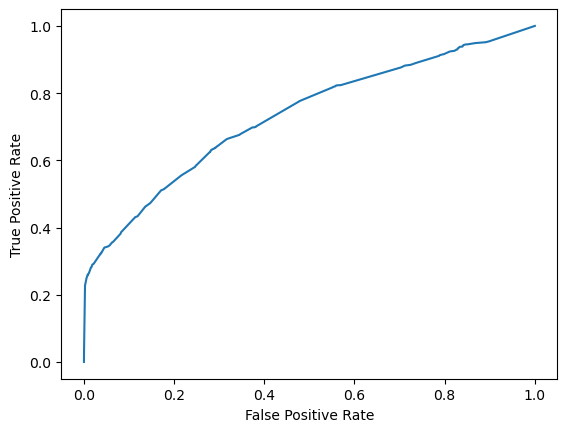

In [53]:
y_pred=decision(x_train,y_train,x_test,y_test)

In [54]:
#pd.DataFrame(x).to_csv("Feature_importance.csv",index=False)

In [55]:
params={'class_weight':[None,'balanced'], 
        'max_depth':[None,5,10,15,20,30,50,70],
        'min_samples_leaf':[1,2,5,10,15,20], 
        'min_samples_split':[2,5,10,15,20]
       }

clf=DecisionTreeClassifier()

#random_search=RandomizedSearchCV(clf,cv=5,param_distributions=params,scoring='f1',n_iter=5,n_jobs=-1,verbose=20)
#random_search.fit(x_train,y_train)
#print(report(random_search.cv_results_,5))

dtree=DecisionTreeClassifier(**{'min_samples_split': 20, 
                                'min_samples_leaf': 10, 
                                'max_depth': 10, 
                                'class_weight': 'balanced'})

dtree_fit =dtree.fit(x_train,y_train)

test_score=dtree_fit.predict_proba(x_test1)[:,1]


y_pred = dtree_fit.predict(x_test1)

print(test_score)
test_classes=(test_score>0.5).astype(int)
print(test_classes)

[0.39125049 0.61499007 0.05356723 ... 0.29706626 0.29706626 0.54736092]
[0 1 0 ... 0 0 1]


In [56]:
test_score_new=pd.DataFrame({"Junk":test_score})

pd.DataFrame(test_score_new).to_csv("Real_Estate_Yashmin_submission2.csv",index=False)

In [ ]:

test_score_new=pd.DataFrame({"Junk":test_score})

pd.DataFrame(test_score_new).to_csv("Real_Estate_Yashmin_submission2.csv",index=False)